<a href="https://colab.research.google.com/github/Emilyjane994/Phenotype-paper/blob/main/AllModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Manuscript: Identification of distinct immune signatures in Inclusion Body Myositis by peripheral blood immunophenotyping using machine learning models
#Authors: Emily McLeish*, Anuradha Sooda*, Nataliya Slater, Kelly Beer, Ian Cooper, Frank. L. Mastaglia, Merrilee Needham & Jerome D. Coudert
#Date:2023
#Last updated: 20/11/2023

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/Manuscript

/content/gdrive/My Drive/Manuscript


In [ ]:
import pickle
from ML_Pipeline.utils import read_data,inspection,null_values, drop_cols
from ML_Pipeline.ml_model import prepare_model_originaldata,all_models
from ML_Pipeline.evaluate_metrics import confusion_matrix,roc_curve, confusion_matrix_plot
# from ML_Pipeline.lime import lime_explanation
import pandas as pd
import matplotlib.pyplot as plt

# to determine the p-values with anova
from sklearn.feature_selection import f_classif, f_regression

# to select features
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
# Read the initial datasets
df = read_data("input/ML_dataset.xlsx")

In [ ]:
df.head()

,ID#,Pathology,Age,Sex,cN1A status,TCRgd,Vd2,Vd2+Vg9+,Vd2CD27-,Vd2+Cx3Cr1+,...,monocytes,Nkcells,Basophils,cDC,CD56-16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes
0,190815_HC_AS,HC,68,M,Healthy,5.07,8.99,88.2,41.7,23.70,...,1.7690,0.2684,0.0729,0.0346,48.0332,5.5944,46.3724,93.5473,3.7536,2.5068
1,190815_HC_BN,HC,73,M,Healthy,3.31,4.16,82.9,84.4,19.90,...,2.0229,0.7299,0.0586,0.1710,6.3267,9.3175,83.7040,91.4568,8.0935,0.3113
2,190822_HC_BW,HC,76,M,Healthy,2.29,4.90,93.3,26.3,6.11,...,0.9251,1.3357,0.0298,0.0083,4.0046,2.4337,93.3299,56.3302,37.7022,5.4843
3,190822_HC_JA,HC,47,M,Healthy,4.96,52.60,66.6,35.2,40.00,...,1.0097,1.1593,0.0152,0.0022,81.9997,0.9686,16.9870,82.0701,16.1163,2.5150
4,190822_HC_LP,HC,49,F,Healthy,1.82,54.00,96.4,24.6,61.70,...,1.8146,2.4483,0.0573,0.0309,15.4730,3.9977,81.4437,97.3687,2.5549,0.0546


In [ ]:
df = df.replace({
    "Pathology": {"HC":0, "IBM":1},
    "Sex":{"M":0, "F":1}
    })

##Original data

In [ ]:
final_report = pd.DataFrame()

In [ ]:
# all_corr = df.corr().unstack().reset_index()
# corr_table = all_corr[all_corr['level_0'] > all_corr['level_1']]
# corr_table.columns = ['var1', 'var2', 'corr_value']
# corr_table['corr_abs'] = corr_table['corr_value'].abs()
# corr_table = corr_table.sort_values(by= ['corr_abs'], ascending = False )
# corr_table.head(15)

In [ ]:
cols_to_exclude = ['ID#', 'cN1A status' ]

In [ ]:
## Exclude columns nor required in cols_to_exclude
X_train, X_test, y_train, y_test = prepare_model_originaldata(df,class_col='Pathology',
                                                              cols_to_exclude=['ID#', 'cN1A status'])

computing GradientBoosting - Original 
computing LogisticRegression - Original 
computing RandomForestClassifier - Original 
computing XGBClassifier - Original 


,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type,f1_betascore,95% CI lower bound,95% CI upper bound
0,GradientBoosting,0.595127,0.913690,0.814815,0.916667,0.862745,Original,0.812160,0.816459,0.956917
1,LogisticRegression,0.610920,0.958333,0.869565,0.833333,0.851064,Original,0.818291,0.706642,0.850573
2,RandomForestClassifier,0.729397,0.937500,0.827586,1.000000,0.905660,Original,0.872932,0.830714,0.952620
3,XGBClassifier,0.599175,0.907738,0.840000,0.875000,0.857143,Original,0.813912,0.769127,0.936285


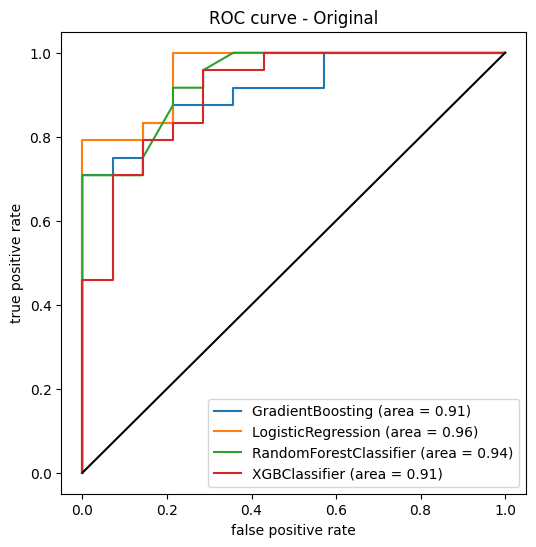

In [ ]:
models_report, conf_matrix = all_models(X_train,y_train,X_test,y_test, 'Original') # change model accordingly
final_report = final_report.append(models_report, ignore_index=True)
models_report

Confusion Matrix for GradientBoosting :


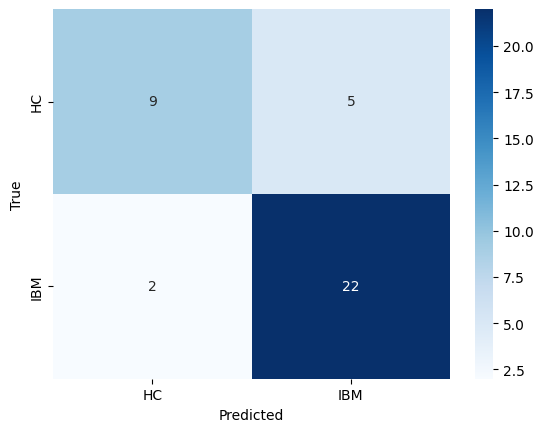



Confusion Matrix for LogisticRegression :


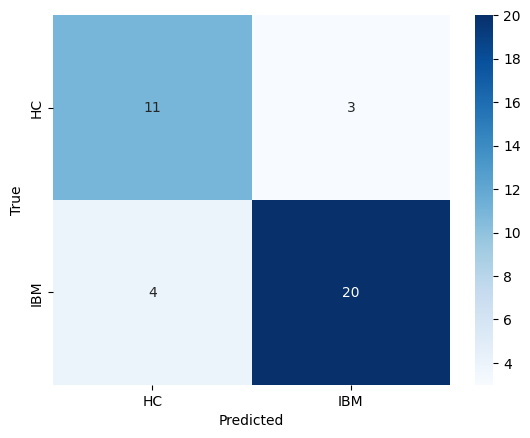



Confusion Matrix for RandomForestClassifier :


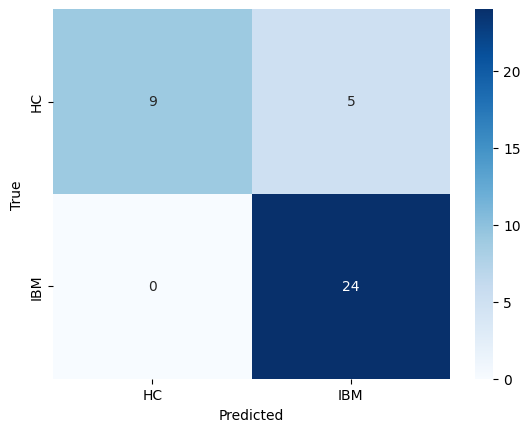



Confusion Matrix for XGBClassifier :


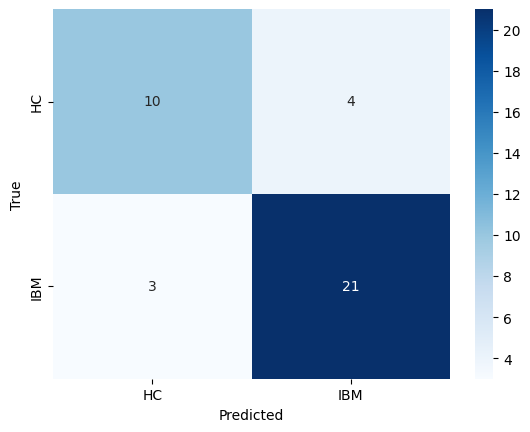

In [ ]:
for name in conf_matrix.keys():
  import seaborn as sns
  print(f"Confusion Matrix for {name} :")
  sns.heatmap(conf_matrix[name],annot=True,cmap="Blues",fmt="g", xticklabels=['HC','IBM'], yticklabels=['HC','IBM'])
  plt.show()
  print('\n')